In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 113.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.0 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import LabelEncoder

!pip install unidecode
!pip install openpyxl

import pandas as pd
from pandas import read_excel
import numpy as np
import re
from re import sub
import multiprocessing
from unidecode import unidecode
import os
from time import time

import csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 5.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
train_path = '/content/drive/MyDrive/thesis/dataset/maxed_train.xlsx'
test_path = '/content/drive/MyDrive/thesis/dataset/test.xlsx'

In [5]:
train = pd.read_excel(train_path)
train.head()

test = pd.read_excel(test_path)
test.head()



,text,classes
0,এত দূর দূর্নীতির সুযোগ পেলো কি করে!,joy
1,"সিরিয়াসলি এত চোর যে গুনে শেষ করা যাচ্ছে না,",anger
2,সবদিক বিবেচনায় সৌরবিদ্যুতই বাংলাদেশের টেকসই জ্...,joy
3,সব চোরের দল গুলোর আবার গোরা থেকে মুসলমানি করে ...,joy
4,রাতে শুয়ে শুয়ে গভীর মনোযোগ দিয়ে বই পড়ছিলাম কি...,anger


In [6]:
len(train.text.value_counts())

15363

In [7]:
len(test.text.value_counts())

3840

In [8]:
train.shape

(21510, 2)

In [9]:
test.shape

(3840, 2)

In [10]:
train.dropna()

,text,classes
0,ভাই পনারা এখনো বেপারটা ভুজেন নাই বাংলা দেশের ব...,surprise
1,ইভ টিজিংয়ের প্রতিবাদ করায় বগুড়ায় বখাটেদের হামল...,anger
2,মনের মধ্যে যত ই কষ্ট থাক না কেন যে কোনো মানুষ ...,disgust
3,সেই টিভি আর ঘড়ি পাওয়া গেছে! (ছবি),joy
4,একমাত্র তোর কাছেই আগল খুলে ঝাঁপিয়ে\nপড়তে ভয় কর...,fear
...,...,...
21505,হাসপাতাল থেকে ছাড়া পেয়েছেন শচীন টেন্ডুলকার।,surprise
21506,সব ম্যাচ জিততে হবে এটা কেউ আশা করে না।,surprise
21507,"মানাবতাবাতী সুলতানা আপা কই,?",disgust
21508,এতো অনিয়মের কয়টার কথা মানুষ বলবে?,joy


In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train['encoded_classes'] = encoder.fit_transform(train['classes'])
train.head()

test['encoded_classes'] = encoder.fit_transform(test['classes'])
test.head()

,text,classes,encoded_classes
0,এত দূর দূর্নীতির সুযোগ পেলো কি করে!,joy,3
1,"সিরিয়াসলি এত চোর যে গুনে শেষ করা যাচ্ছে না,",anger,0
2,সবদিক বিবেচনায় সৌরবিদ্যুতই বাংলাদেশের টেকসই জ্...,joy,3
3,সব চোরের দল গুলোর আবার গোরা থেকে মুসলমানি করে ...,joy,3
4,রাতে শুয়ে শুয়ে গভীর মনোযোগ দিয়ে বই পড়ছিলাম কি...,anger,0


In [12]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)

    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰⚽️✌�￰৷￰'''

    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [13]:
train['text'] = train.text.apply(lambda x: preprocessing(str(x)))

In [14]:
test['text'] = test.text.apply(lambda x: preprocessing(str(x)))

In [15]:
train.reset_index(drop=True, inplace=True)

In [16]:
xtrain = train['text']
ytrain = train['encoded_classes']
xtest = test['text']
ytest = test['encoded_classes']

In [17]:
df = pd.DataFrame(xtest)
df1 = pd.DataFrame(ytest)

In [18]:
df.head()

,text
0,এত দূর দূর্নীতির সুযোগ পেলো কি করে
1,সিরিয়াসলি এত চোর যে গুনে শেষ করা যাচ্ছে না
2,সবদিক বিবেচনায় সৌরবিদ্যুতই বাংলাদেশের টেকসই জ্...
3,সব চোরের দল গুলোর আবার গোরা থেকে মুসলমানি করে ...
4,রাতে শুয়ে শুয়ে গভীর মনোযোগ দিয়ে বই পড়ছিলাম কি...


In [19]:
df.shape

(3840, 1)

In [20]:
df1.shape

(3840, 1)

In [21]:
xtrain = xtrain.astype(str).values.tolist()
xtest = xtest.astype(str).values.tolist()

In [22]:
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")

In [23]:
# Tokenize train reviews
encoded_text = [tokenizer.encode(sent, add_special_tokens=True) for sent in xtrain]

# Find the longest tokenized review
max_len = max([len(sent) for sent in encoded_text])
print('Max length: ', max_len)

Token indices sequence length is longer than the specified maximum sequence length for this model (881 > 512). Running this sequence through the model will result in indexing errors


Max length:  1173


In [24]:
encoded_data_train = tokenizer.batch_encode_plus(
    xtrain,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    truncation=True,
    max_length=256,
    return_tensors='pt'
)

encoded_data_test = tokenizer.batch_encode_plus(
    xtest,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    truncation=True,
    max_length=256,
    return_tensors='pt'
)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 

In [25]:
!pip install torch
import torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
from torch.utils.data import TensorDataset

In [27]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(ytrain.values)


input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(ytest.values)


# Pytorch TensorDataset Instance
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)

In [28]:

from transformers import DataCollatorWithPadding,AutoModelForSequenceClassification, Trainer, TrainingArguments,AutoTokenizer,AutoModel,AutoConfig
from transformers.modeling_outputs import TokenClassifierOutput
import torch
import torch.nn as nn
import pandas as pd

In [29]:
class CustomModel(nn.Module):
  def __init__(self,checkpoint,num_labels):
    super(CustomModel,self).__init__()
    self.num_labels = num_labels

    #Load Model with given checkpoint and extract its body
    self.model = model = AutoModel.from_pretrained(checkpoint,config=AutoConfig.from_pretrained(checkpoint, output_attentions=True,output_hidden_states=True))
    self.dropout = nn.Dropout(0.1)
    self.classifier = nn.Linear(768,num_labels) # load and initialize weights

  def forward(self, input_ids=None, attention_mask=None,labels=None):
    #Extract outputs from the body
    outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)

    #Add custom layers
    sequence_output = self.dropout(outputs[0]) #outputs[0]=last hidden state

    logits = self.classifier(sequence_output[:,0,:].view(-1,768)) # calculate losses

    loss = None
    if labels is not None:
      loss_fct = nn.CrossEntropyLoss()
      loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))

    return TokenClassifierOutput(loss=loss, logits=logits, hidden_states=outputs.hidden_states,attentions=outputs.attentions)

In [30]:
checkpoint="bert-base-multilingual-cased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=CustomModel(checkpoint=checkpoint,num_labels=6).to(device)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [31]:
for name, param in model.named_parameters():
    print(name, param.requires_grad)

model.embeddings.word_embeddings.weight True
model.embeddings.position_embeddings.weight True
model.embeddings.token_type_embeddings.weight True
model.embeddings.LayerNorm.weight True
model.embeddings.LayerNorm.bias True
model.encoder.layer.0.attention.self.query.weight True
model.encoder.layer.0.attention.self.query.bias True
model.encoder.layer.0.attention.self.key.weight True
model.encoder.layer.0.attention.self.key.bias True
model.encoder.layer.0.attention.self.value.weight True
model.encoder.layer.0.attention.self.value.bias True
model.encoder.layer.0.attention.output.dense.weight True
model.encoder.layer.0.attention.output.dense.bias True
model.encoder.layer.0.attention.output.LayerNorm.weight True
model.encoder.layer.0.attention.output.LayerNorm.bias True
model.encoder.layer.0.intermediate.dense.weight True
model.encoder.layer.0.intermediate.dense.bias True
model.encoder.layer.0.output.dense.weight True
model.encoder.layer.0.output.dense.bias True
model.encoder.layer.0.output.La

In [32]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size=8;
dataloader_train = DataLoader(dataset_train,
                              sampler=RandomSampler(dataset_train),
                              batch_size=batch_size)


dataloader_test = DataLoader(dataset_test,
                                   sampler=SequentialSampler(dataset_test),
                                   batch_size=batch_size)

In [33]:
from transformers import AdamW,get_scheduler

optimizer = AdamW(model.parameters(), lr=2e-5)

num_epochs = 20
num_training_steps = num_epochs * len(dataloader_train)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps,
)
print(num_training_steps)


53780


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [34]:
from tqdm.auto import tqdm




for epoch in range(num_epochs):
  model.train()
  loss_train_total = 0
  progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
  for batch in progress_bar:
      batch = tuple(b.to(device) for b in batch)
      inputs = {'input_ids':      batch[0].to(device),
                'attention_mask': batch[1].to(device),
                'labels':         batch[2].to(device),
                }

      outputs = model(**inputs)
      loss = outputs[0]
      loss_train_total += loss.item()
      loss.backward()

      optimizer.step()
      lr_scheduler.step()
      optimizer.zero_grad()
      progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
  tqdm.write(f'\nEpoch {epoch}')
  loss_train_avg = loss_train_total/len(dataloader_train)
  tqdm.write(f'Training loss: {loss_train_avg}')

Epoch 0:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 0
Training loss: 1.5178737858162799


Epoch 1:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 1
Training loss: 1.2088851683997186


Epoch 2:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 2
Training loss: 1.1299358260104009


Epoch 3:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 3
Training loss: 1.036655564098032


Epoch 4:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.9064500752743645


Epoch 5:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 5
Training loss: 0.7579697274854743


Epoch 6:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 6
Training loss: 0.6208507309168336


Epoch 7:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 7
Training loss: 0.5061024929853638


Epoch 8:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 8
Training loss: 0.4154459607761281


Epoch 9:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 9
Training loss: 0.3400958228198096


Epoch 10:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 10
Training loss: 0.2802052331672564


Epoch 11:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 11
Training loss: 0.2407598962841345


Epoch 12:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 12
Training loss: 0.20009977789219072


Epoch 13:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 13
Training loss: 0.17344584283757505


Epoch 14:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 14
Training loss: 0.14917372924898858


Epoch 15:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 15
Training loss: 0.1262462550334185


Epoch 16:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 16
Training loss: 0.11056283783516457


Epoch 17:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 17
Training loss: 0.09422218168668942


Epoch 18:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 18
Training loss: 0.08636072948029959


Epoch 19:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 19
Training loss: 0.07451052904709936


In [35]:
def evaluate(dataloader_test):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_test:

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloader_test)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

In [36]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

In [37]:
val_loss, predictions, true_vals = evaluate(dataloader_test)
val_f1 = f1_score_func(predictions, true_vals)

In [38]:
print('Val Loss = ', val_loss)
print('Val F1 = ', val_f1)

Val Loss =  3.1105076444281923
Val F1 =  0.5188670628646883


In [39]:
encoded_classes = encoder.classes_
predicted_category = [encoded_classes[np.argmax(x)] for x in predictions]
true_category = [encoded_classes[x] for x in true_vals]

In [40]:
x = 0
for i in range(len(true_category)):
    if true_category[i] == predicted_category[i]:
        x += 1

print('Accuracy Score = ', x / len(true_category))

Accuracy Score =  0.5190104166666667


In [41]:
df2 = pd.DataFrame(predictions)
df2.shape

(3840, 6)

In [42]:
df3 = pd.DataFrame(true_vals)
df3.shape

(3840, 1)

In [43]:
df1.reset_index(inplace=True, drop=True)
df.reset_index(inplace=True, drop=True)
df2.reset_index(inplace=True, drop=True)
df3.reset_index(inplace=True, drop=True)

In [44]:
df4 = pd.concat([df, df1, df2, df3], axis = 1)

In [45]:
df4.shape

(3840, 9)

In [46]:
df4.head()

,text,encoded_classes,0,1,2,3,4,5,0
0,এত দূর দূর্নীতির সুযোগ পেলো কি করে,3,-0.777966,-1.802827,-1.505900,8.610103,-2.487267,-2.022714,3
1,সিরিয়াসলি এত চোর যে গুনে শেষ করা যাচ্ছে না,0,8.121108,-1.813877,-0.775155,-0.237847,-3.036983,-2.461585,0
2,সবদিক বিবেচনায় সৌরবিদ্যুতই বাংলাদেশের টেকসই জ্...,3,1.420434,4.966418,-3.996937,0.193226,2.550802,-5.297356,3
3,সব চোরের দল গুলোর আবার গোরা থেকে মুসলমানি করে ...,3,-0.556127,-2.424093,-2.349676,8.325783,-2.276937,-0.714957,3
4,রাতে শুয়ে শুয়ে গভীর মনোযোগ দিয়ে বই পড়ছিলাম কি...,0,-2.280668,-1.443107,8.608155,-0.546901,-0.523551,-2.065363,0


In [47]:
df4.to_csv('/content/drive/MyDrive/thesis/output.csv')

In [48]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_true = true_category, y_pred = predicted_category, labels=list(encoded_classes))

<Axes: >

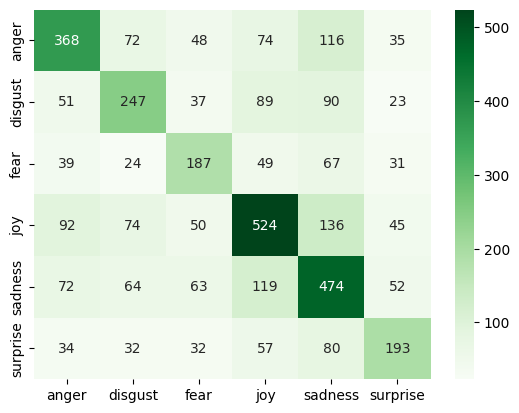

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(confusion_mat, index = list(encoded_classes),columns = list(encoded_classes))
sns.heatmap(df, annot=True,cmap="Greens", fmt='g')

Text(95.72222222222221, 0.5, 'Predicted Label')

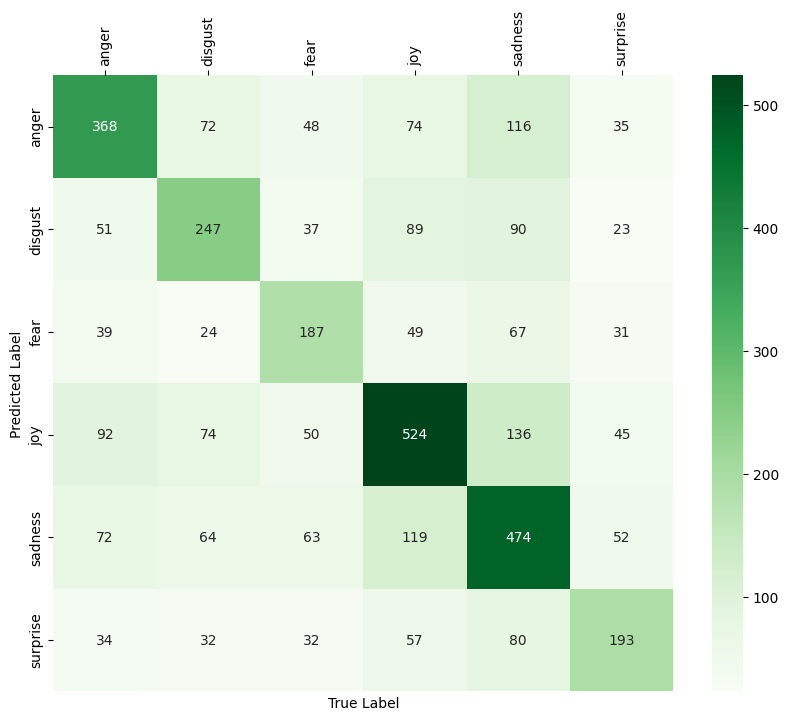

In [50]:
import seaborn as sns
# return class label
# get confusion matrix
cm = confusion_matrix(y_true = true_category, y_pred = predicted_category, labels=list(encoded_classes))
# covert it to dataframe for plotting
cm_df = pd.DataFrame(cm,
                     index = list(encoded_classes),
                     columns = list(encoded_classes))
# plot it
plt.figure(figsize = (10,8))
g = sns.heatmap(cm_df,annot=True,cmap="Greens", fmt='g')
g.xaxis.set_ticks_position("top")
g.tick_params(axis='x', rotation=90)
g.set_xlabel("True Label")
g.set_ylabel("Predicted Label")

In [51]:
from sklearn.metrics import classification_report
report = pd.DataFrame(classification_report(y_true = true_category, y_pred = predicted_category, output_dict=True)).transpose()
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

,precision,recall,f1-score,support
anger,56.10,51.61,53.76,713.00000
disgust,48.15,46.00,47.05,537.00000
fear,44.84,47.10,45.95,397.00000
joy,57.46,56.89,57.17,921.00000
sadness,49.22,56.16,52.46,844.00000
surprise,50.92,45.09,47.83,428.00000
accuracy,51.90,51.90,51.90,0.51901
macro avg,51.12,50.48,50.70,3840.00000
weighted avg,52.06,51.90,51.89,3840.00000
